<a href="https://colab.research.google.com/github/franciscosalido/AIML/blob/master/Bank_Personal_Loan_Campaign_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thera Bank Personal Loan Campaign**

## Data Description:

> The  file  Bank.xls  contains  data  on  5000  customers.  The  data  include  customer  demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account,  etc.), and the  customer  response to  the  last  personal  loan  campaign  (Personal  Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Domain:

> Banking

## Context:

> This case is about a bank (Thera Bank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over9%  success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

##Attribute Information:

> > 
* ID: Customer ID 
* Age: Customer's age in completed years
* Experience: # years of professional experience
* Income: Annual income of the customer
* ZIP Code: Home Address ZIPcode.
* Family: Family size of thecustomer
* CCAvg: Avg. spending on credit cards per month
* Education: Education Level: 
 * 1: Undergrad; 
 * 2: Graduate;
 * 3:Advanced/Professional.
* Mortgage: Value of house mortgage if any.
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card is sued by the bank?






---

## Learning Outcomes:

> >
* Exploratory Data Analysis (EDA)
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation Objective: The classification goal is to predict the likelihood of a liability customer buying personal loans.



## Steps and tasks:


1.   Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)


2.   EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings (20 marks) 
* Number of unique in each column?
* Number of people with zero mortgage? 
* Number of people with zero credit card spending per month? 
* Value counts of all categorical columns. 
* Univariate and Bivariate 
* Get data model ready



3.   Split the data into training and test seting the ratio of 70:30 respectively (5marks)


4.  Use Logistic Regression model to predict the number of a customer buying personal loans. Print all the metrics related for evaluating the model performance (15marks)


5.  Give your reasoning on how can the model perform better? (10 marks)
>> 
Hint: Check parameter


6.  Give Business understanding of your model? (5 marks)

##### 0. Preface

In [0]:
#!/usr/bin/python
# Date: 2020/04/25
# Code by Francisco Arruda Salido
# Version: 1.0.0

##### 1.a. Import the libraries

In [0]:
# import structures and data analysis libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# automaticly render any figure in a notebook made with this library
%matplotlib inline

In [0]:
# import machine learning libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score,accuracy_score

##### 1.b. Import the dataset

In [74]:
# Mount the google drive and set the path to the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [75]:
root_path = '/content/drive/My\ Drive/AIML/BankLoanCampaign/'  #set a dir to the project folder
!ls /content/drive/My\ Drive/AIML/BankLoanCampaign/ #change dir to the project folder

Bank_Personal_Loan_Modelling.csv


In [0]:
data = pd.read_csv('/content/drive/My Drive/AIML/BankLoanCampaign/Bank_Personal_Loan_Modelling.csv') #import the dataset Data.csv from specific path

###### 1.b Housekipping

In [0]:
np.set_printoptions(precision=3, suppress=True) # Make numpy values easier to read.

pd.set_option("display.precision", 3) # Use 3 decimal places in output display

pd.set_option("display.expand_frame_repr", False) # Don't wrap repr(DataFrame) across additional lines

pd.set_option("display.max_rows", 25) # Set max rows displayed in output to 25

##### 1.c Check Datatype

In [78]:
data.head() # check the name of the columns and the first 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [79]:
data.info(); # check some information about the variables (columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##### 1.d Statistical Summary

In [0]:
# Creating a copy of the Data for manipulation
df = data.copy()

In [81]:
df = df.drop(['ID', 'ZIP Code'], axis= 1) # drop the categorical columns 'ID' and 'ZIP Code'

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338,11.463,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.105,11.468,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774,46.034,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396,1.148,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.938,1.748,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881,0.840,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.499,101.714,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096,0.295,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104,0.306,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060,0.238,0.0,0.0,0.0,0.0,1.0


In [82]:
#  Rearranging the columns orders for bringing the "Personal Loan " to the end of the dataframe.
personal_loan = df['Personal Loan']
df.drop(['Personal Loan'], axis = 1,inplace = True)
df['Personal Loan'] = personal_loan
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


1. Shape

In [83]:
df.shape # check the shape after droping and rearrangig columns

(5000, 12)

###### 1.e Check for invalid values

In [84]:
df.isnull().sum() # check for null values by row

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [85]:
df.isnull().sum().any() # check for null values in the dataframe

False

In [86]:
# Checking the Dataframe Distributions
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338,11.463,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.105,11.468,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774,46.034,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396,1.148,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.938,1.748,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881,0.840,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.499,101.714,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104,0.306,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060,0.238,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.597,0.491,0.0,0.0,1.0,1.0,1.0


###### There is negative values in the 'Experience' column

In [87]:
# Experience can't be a negative values
df[df['Experience'] <= -1]['Experience'].count() # count the total of negative numbers in the 'Experience' row

52

In [0]:
# Get the numeric data from the 'Experience' column and replace just the negatives value by the Mode() function (Median() will be afected by the negative values) 
df.loc[(df['Experience'] <= -1), 'Experience'] = df['Experience'].mode()

In [89]:
# Checking the new distribution in 'Experience'
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338,11.463,23.0,35.00,45.0,55.0,67.0
Experience,4948.0,20.331,11.312,0.0,10.75,20.0,30.0,43.0
Income,5000.0,73.774,46.034,8.0,39.00,64.0,98.0,224.0
Family,5000.0,2.396,1.148,1.0,1.00,2.0,3.0,4.0
CCAvg,5000.0,1.938,1.748,0.0,0.70,1.5,2.5,10.0
Education,5000.0,1.881,0.840,1.0,1.00,2.0,3.0,3.0
Mortgage,5000.0,56.499,101.714,0.0,0.00,0.0,101.0,635.0
Securities Account,5000.0,0.104,0.306,0.0,0.00,0.0,0.0,1.0
CD Account,5000.0,0.060,0.238,0.0,0.00,0.0,0.0,1.0
Online,5000.0,0.597,0.491,0.0,0.00,1.0,1.0,1.0


In [90]:
# Cheking again if 'Experience' has any negative values
df[df['Experience'] <= -1]['Experience'].count()

0

### 2. Exploratory Data Analysis:

##### 2.1 Number of unique in each column?

In [91]:
df.nunique()

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Personal Loan           2
dtype: int64

In [92]:
df.apply(lambda x: len(x.unique()))

Age                    45
Experience             45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Personal Loan           2
dtype: int64

2.2 Number of people with zero mortgage?

In [93]:
a= df['Mortgage'].isin([0]).sum()
print('The number of clients with zero Mortgage are {}'.format(a))

The number of clients with zero Mortgage are 3462


2.3 Number of people with zero credit card spending per month?

In [94]:
b= df['CCAvg'].isin([0]).sum()
print('The number of clients with zero Credit Card spending are {}'.format(b))

The number of clients with zero Credit Card spending are 106


#### 2.4 Value counts of all categorical columns.

In [0]:
# list of Columns Types
numerical_columns_list= ('Age', 'Experience', 'Income', 'CCAvg', 'Mortgage')
categorical_columns_list= ('Family',	'Education',	'Personal Loan',	'Securities Account', 'CD Account',	'Online',	'CreditCard') 

#### 2.4.1 Categorical Columns

2.4.1.1 Family

In [96]:
# Family value count and Percetantage
family_count = pd.Series(df['Family'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':family_count.values, 'Percentage':(family_count/family_count.sum()).values})

,Count,Percentage
0,1472,0.294
1,1296,0.259
2,1222,0.244
3,1010,0.202


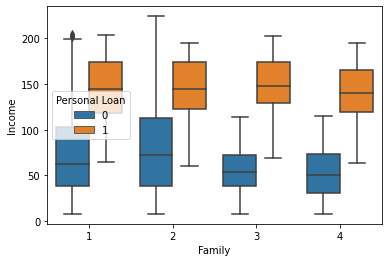

In [97]:
# Family value per Income grouped by Personal Loan
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df);

#### 2.4.1.2 Education

In [98]:
# Education value count and Percetantage
education_count = pd.Series(df['Education'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':education_count.values, 'Percentage':(education_count/education_count.sum()).values})

,Count,Percentage
0,2096,0.419
1,1501,0.300
2,1403,0.281


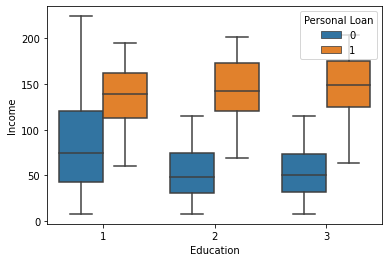

In [99]:
# Education degree per Income grouped by Personal Loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df);

2.4.1.3 Personal Loan

In [100]:
# Personal Loan value count and Percetantage
personalloan_count = pd.Series(df['Personal Loan'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':personalloan_count.values, 'Percentage':(personalloan_count/personalloan_count.sum()).values})

,Count,Percentage
0,4520,0.904
1,480,0.096


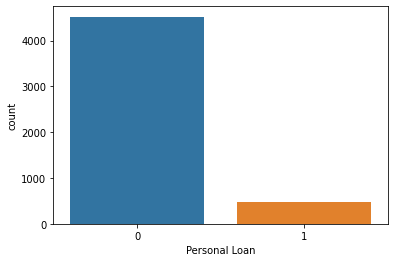

In [101]:
# Personal Loan plot
sns.countplot(x="Personal Loan", data=df);

###### This is a assimetry distribution in Personal Loan 

#### 2.4.1.4 Securities Account

In [102]:
securitiesaccount_count = pd.Series(df['Securities Account'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':securitiesaccount_count.values, 'Percentage':(securitiesaccount_count/securitiesaccount_count.sum()).values})

,Count,Percentage
0,4478,0.896
1,522,0.104


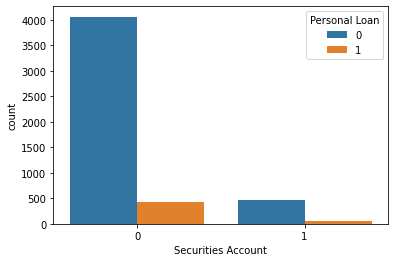

In [103]:
# Security Account plot
sns.countplot(x="Securities Account", data=df,hue="Personal Loan");

###### This is a assimetry distribution in Security Account and
###### The majority of customers who doesn´t have loan have securities account

#### 2.4.1.5 CD Account

In [104]:
# CD Account count value and Percentage
cdaccount_count = pd.Series(df['CD Account'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':cdaccount_count.values, 'Percentage':(cdaccount_count/cdaccount_count.sum()).values})

,Count,Percentage
0,4698,0.94
1,302,0.06


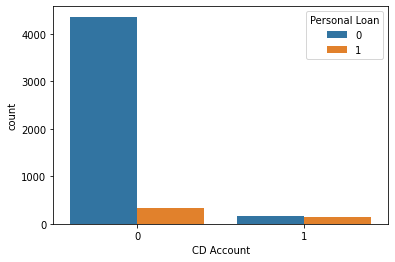

In [105]:
# CD Account plot
sns.countplot(x='CD Account', data=df,hue="Personal Loan");

#### 2.4.1.6 Online

In [106]:
# Online count value and Percentage
online_count = pd.Series(df['Online'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':online_count.values, 'Percentage':(online_count/online_count.sum()).values})

,Count,Percentage
0,2984,0.597
1,2016,0.403


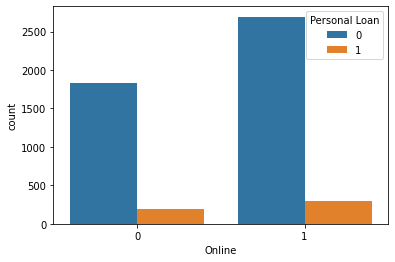

In [107]:
# Online plot
sns.countplot(x='Online', data=df,hue="Personal Loan");

#### 2.4.1.7 CreditCard

In [108]:
# Online count value and Percentage
creditcard_count = pd.Series(df['CreditCard'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':creditcard_count.values, 'Percentage':(creditcard_count/creditcard_count.sum()).values})

,Count,Percentage
0,3530,0.706
1,1470,0.294


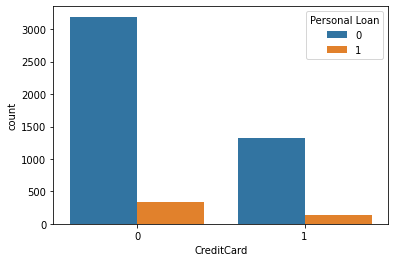

In [109]:
# Credit Card plot
sns.countplot(x='CreditCard', data=df,hue="Personal Loan");

#### 2.5.2 Numerical data 

2.5.2.1 Income 

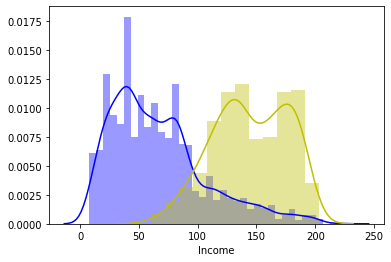

In [110]:
# Histogram plot for Income distribution by Personal Loan
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y');

The graph show those who have personal loan also have a higher income.

##### Checking for correlation

In [111]:
# check correlation between personal loan and numerical variables
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000,-0.008,0.502,0.367,0.142
Age,-0.008,1.000,-0.055,-0.052,-0.013
Income,0.502,-0.055,1.000,0.646,0.207
CCAvg,0.367,-0.052,0.646,1.000,0.110
Mortgage,0.142,-0.013,0.207,0.110,1.000


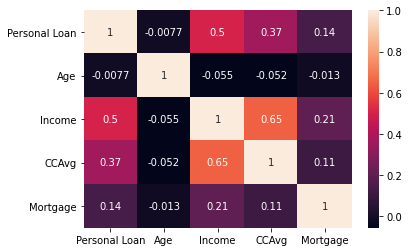

In [112]:
# correlation heatmap between personal loan and numerical variables
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True);

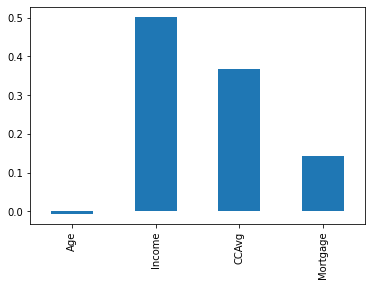

In [113]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar();

###### There is a high correlation between the independant variable and dependant variables as we see in 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

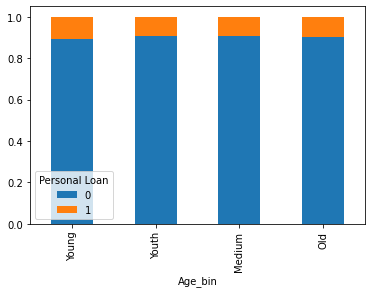

In [114]:
bins= [23, 35, 45, 55, 65]                            # Create 4 age bins
group= ['Young', 'Youth', 'Medium', 'Old']            # Name the age bins
df['Age_bin']=pd.cut(df['Age'], bins, labels= group ) # Converting numeric into categorical variable
age= pd.crosstab(df['Age_bin'], df['Personal Loan']) 
age.div(age.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True);

###### Applicant age-goup does not affect the chances of buying the personal loan

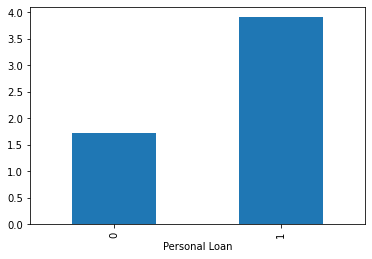

In [115]:
df.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar');

###### It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans

### 2.6 Get data model ready

In [116]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,2500.50,45.338,20.105,73.774,93152.503,2.396,1.938,1.881,56.499,0.096,0.104,0.060,0.597,0.294
std,1443.52,11.463,11.468,46.034,2121.852,1.148,1.748,0.840,101.714,0.295,0.306,0.238,0.491,0.456
min,1.00,23.000,-3.000,8.000,9307.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1250.75,35.000,10.000,39.000,91911.000,1.000,0.700,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2500.50,45.000,20.000,64.000,93437.000,2.000,1.500,2.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,3750.25,55.000,30.000,98.000,94608.000,3.000,2.500,3.000,101.000,0.000,0.000,0.000,1.000,1.000
max,5000.00,67.000,43.000,224.000,96651.000,4.000,10.000,3.000,635.000,1.000,1.000,1.000,1.000,1.000


In [0]:
# Lets drop some categorical and numerical columns without Personal Loan correlation
cleaned_df = data.drop(['ID', 'Age', 'Experience', 'ZIP Code', 'Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'], axis=1)

In [118]:
#  Rearranging the columns orders for bringing the "Personal Loan " to the end of the dataframe.
personal_loan = cleaned_df['Personal Loan']
cleaned_df.drop(['Personal Loan'], axis = 1,inplace = True)
cleaned_df['Personal Loan'] = personal_loan
cleaned_df.head()

,Income,CCAvg,Mortgage,Personal Loan
0,49,1.6,0,0
1,34,1.5,0,0
2,11,1.0,0,0
3,100,2.7,0,0
4,45,1.0,0,0


#### Bivariate Resume

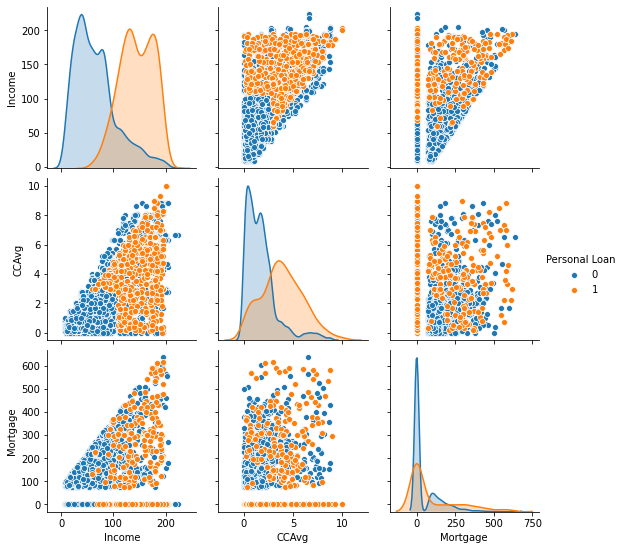

In [119]:
# Data distribution using Personal Loan as hue:
sns.pairplot(cleaned_df, hue='Personal Loan');

### 3. Split the data into training and test seting the ratio of 70:30 respectively (5marks)

In [0]:
X = cleaned_df.drop('Personal Loan', axis=1) # define X variable
y = cleaned_df['Personal Loan']              # define y variable  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)  # Split the data using sklearn and stratified shuffle split

In [121]:
print("The training set has {0:0.2f}% of the cleaned data".format((len(X_train)/len(cleaned_df.index)) * 100))
print("The test set has {0:0.2f}% of the cleaned data".format((len(X_test)/len(cleaned_df.index)) * 100))

The training set has 70.00% of the cleaned data
The test set has 30.00% of the cleaned data


#### 4. Logistic Regression model to predict the number of a customer buying personal loans. Print all the metrics related for evaluating the model performance (15marks)

In [122]:
# Defgine a basic Logistic Regression model

logmodel = LogisticRegression(random_state=42, max_iter=4000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Calculate de Predicted y
y_predict = logmodel.predict(X_test)

In [124]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logmodel.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.91


In [125]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


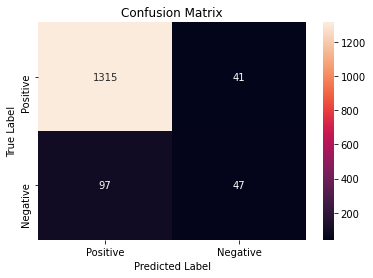

In [126]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show();

In [127]:
print('Model Sensitivity (TPR) {:.2f}'.format(recall_score(y_test,y_predict)))
print('Model Precision (PPV) {:.2f}'.format(precision_score(y_test,y_predict)))
print('Model F1-Score (harmonic mean of precision and sensitivity) {:.2f}'.format(f1_score(y_test,y_predict)))
print('Model Roc Auc Score (ROC Curve Score) {:.2f}'.format(roc_auc_score(y_test,y_predict)))

Model Sensitivity (TPR) 0.33
Model Precision (PPV) 0.53
Model F1-Score (harmonic mean of precision and sensitivity) 0.41
Model Roc Auc Score (ROC Curve Score) 0.65


In [128]:
# Classification Report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.53      0.33      0.41       144

    accuracy                           0.91      1500
   macro avg       0.73      0.65      0.68      1500
weighted avg       0.89      0.91      0.90      1500



##### ROC Curve

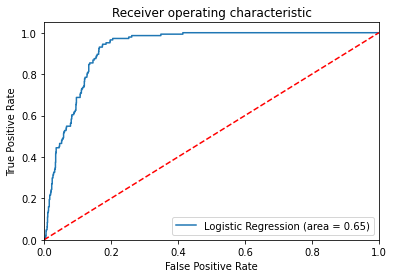

In [129]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5. Give your reasoning on how can the model perform better? (10 marks)

In [130]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.530986
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.679   
Dependent Variable: Personal Loan    AIC:              5315.8629
Date:               2020-05-09 21:15 BIC:              5335.4145
No. Observations:   5000             Log-Likelihood:   -2654.9  
Df Model:           2                LL-Null:          -1581.0  
Df Residuals:       4997             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Income      -0.0145    0.0010  -15.0236  0.0000  -0.0164  -0.0126
CCAvg       -0.0046    0.0310   -0.1495  0.8811  -0.0654   0.0562
Mortgage

### Check parameter

In [131]:
logmodel.get_params() # Checking the parameters of Logistic Regression:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 4000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [132]:
# ForLoop to check differents values for 'solver' :

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42, penalty='l2', C=0.75, solver=i, max_iter=4000)
    model.fit(X_train, y_train) 
    y1_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))

# Now print scores:
print(solver)
print(train_score)
print(test_score)


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
[0.908, 0.908, 0.908, 0.9, 0.901]
[0.908, 0.908, 0.909, 0.904, 0.9]


#### The best solver types are 'newton-cg' and 'lbfgs' 

In [133]:
# Changing solver 'saga' type another try changing the Penalty:

model = LogisticRegression(random_state=42, penalty='l1', C=0.75, solver='saga', max_iter=4000)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)     

print('The Accuracy in the trainnig set is {:.2f}'.format(model.score(X_train,y_train)))
print('The Accuracy in the testing set is {:.2f}'.format(model.score(X_test, y_test)))   
print()
print(classification_report(y_test, y_predict))

The Accuracy in the trainnig set is 0.90
The Accuracy in the testing set is 0.90

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1356
           1       0.20      0.01      0.03       144

    accuracy                           0.90      1500
   macro avg       0.55      0.50      0.49      1500
weighted avg       0.84      0.90      0.86      1500



##### The accuracy keep the same using 'l1' compared to 'l2' Penalty modes.
##### Saga solver type isn't so good.

In [134]:
# Changing class weight to balanced to see what happens:

model = LogisticRegression(random_state=42, penalty='l2', class_weight='balanced') 

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print('The Accuracy in the trainnig set is {:.2f}'.format(model.score(X_train,y_train)))
print('The Accuracy in the testing set is {:.2f}'.format(model.score(X_test, y_test)))
print()
print(classification_report(y_test, y_predict))

The Accuracy in the trainnig set is 0.86
The Accuracy in the testing set is 0.85

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1356
           1       0.39      0.89      0.54       144

    accuracy                           0.85      1500
   macro avg       0.69      0.87      0.73      1500
weighted avg       0.93      0.85      0.88      1500



In [135]:
# A ForLoop to check different values of 'C':

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42, penalty='l2', class_weight='none', C=i)
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(C)
print(train_score)
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.908, 0.908, 0.908, 0.908, 0.908, 0.908]
[0.908, 0.908, 0.908, 0.908, 0.908, 0.908]


### Optimized Model

In [0]:
final_model = LogisticRegression(random_state=42, penalty='l2', class_weight='none', C=0.5) 
final_model.fit(X_train, y_train)
final_y_predict = model.predict(X_test)


In [137]:
print('The Accuracy in the trainnig set is {:.2f}'.format(final_model.score(X_train,y_train)))
print('The Accuracy in the testing set is {:.2f}'.format(final_model.score(X_test, y_test)))
print()
print(classification_report(y_test, final_y_predict))

The Accuracy in the trainnig set is 0.91
The Accuracy in the testing set is 0.91

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.53      0.33      0.41       144

    accuracy                           0.91      1500
   macro avg       0.73      0.65      0.68      1500
weighted avg       0.89      0.91      0.90      1500



### Final Confusion Matrix

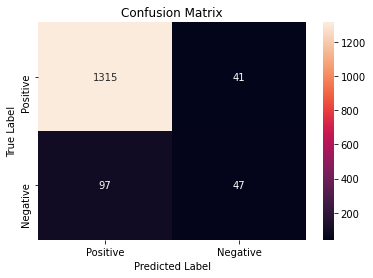

In [138]:
finalcm = confusion_matrix(y_test, final_y_predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(finalcm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show();

In [139]:
print('Model Sensitivity (TPR) {:.2f}'.format(recall_score(y_test,final_y_predict)))
print('Model Precision (PPV) {:.2f}'.format(precision_score(y_test,final_y_predict)))
print('Model F1-Score (harmonic mean of precision and sensitivity) {:.2f}'.format(f1_score(y_test,final_y_predict)))
print('Model Roc Auc Score (ROC Curve Score) {:.2f}'.format(roc_auc_score(y_test,final_y_predict)))

Model Sensitivity (TPR) 0.33
Model Precision (PPV) 0.53
Model F1-Score (harmonic mean of precision and sensitivity) 0.41
Model Roc Auc Score (ROC Curve Score) 0.65


#### The model cound perform better if:
 - The unbalanced categorical variable 'Personal Loan' are balanced during the aquisicion
 - We could use the StratifiedShuffleSplit to 'balance de percentage during the split'
 - Logistic Regression algorithm has a high accuracy in both training and testing sets

### 6. Give Business understanding of your model? (5 marks)

### Business Insights:

###### The Tera Bank wants loan for elegible people and dont give loans to people who may default.

###### So they want a high True Positive value and a low False Positive value. 

###### If False Positive is high the bank would lose money so Precision is the important metric.

###### In case of False Negative, the Bank will lose few customers but that's okay, because the bank want to retain money more than losing money to customers that wont pay back.

###### After achieving the desired accuracy we can deploy the model for practical use. Now the Bank can predict who is eligible for Personal Loan. They can use the model for upcoming customers.